In [109]:
import numpy as np

import os, sys, plotly.graph_objects as go
import plotly.figure_factory as ff
module_path = os.path.abspath(os.path.join('../../../../..'))
if module_path not in sys.path:
    sys.path.append(module_path) 

from sklearn.naive_bayes import GaussianNB
from sklearn import datasets 

from erudition.learning.helpers.plots.plotly_render import render, scatter

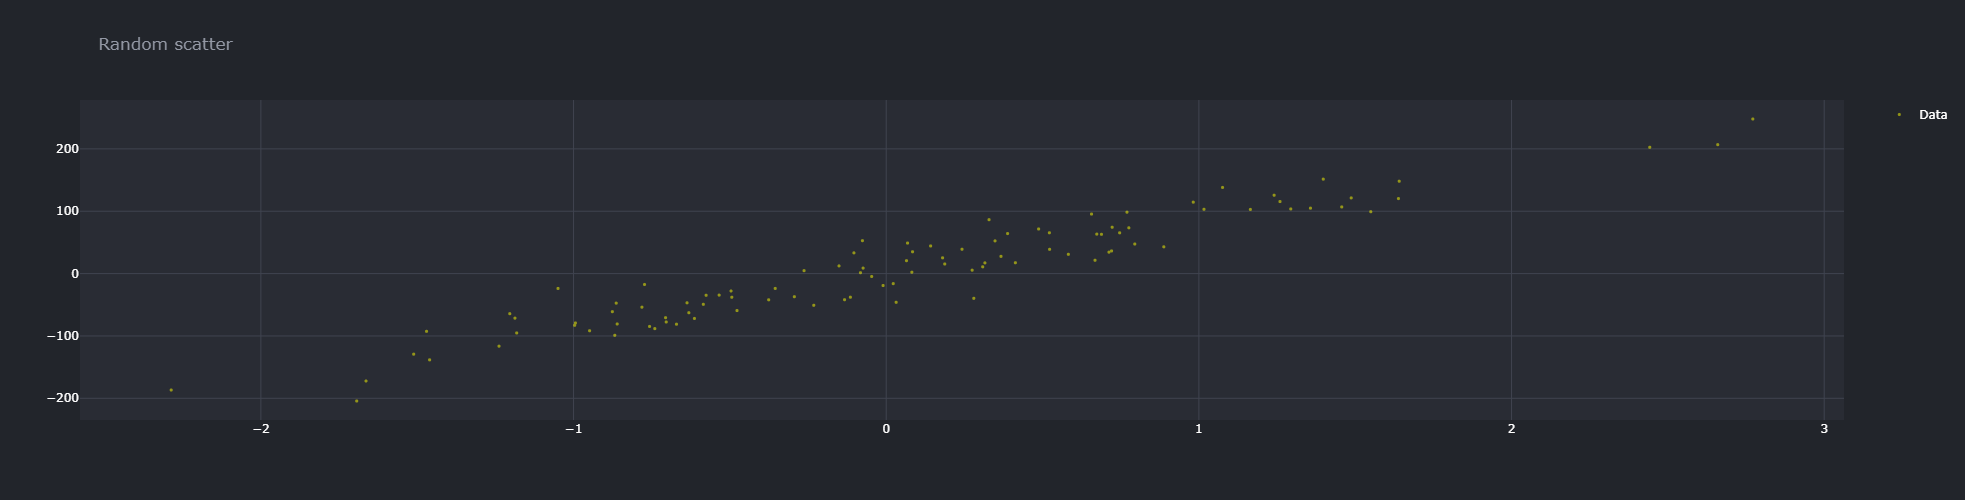

In [172]:
x,y = datasets.make_regression(n_features=1, n_samples=100, noise=25)

render(go.Figure(data=[scatter(x[:,0], y, 'Data', mode='markers')]), title='Random scatter')

In [173]:
def cost_function(thetas, X, y, m):
    dt = np.dot(X, thetas) - y
    return np.dot(dt,dt)/(2*m)

In [174]:
def gradient_descent(thetas, X, y, m, alpha, iters = 10):
    
    t0 = thetas[0]
    t1 = thetas[1]
    
    thetas_new = thetas.copy()
    
    j_history = np.zeros(iters)
    
    for _ in range(iters):
        
        thetas_new -= alpha * np.dot(X.T, (np.dot(X, thetas_new) - y)) / m
        j_history[_] = cost_function(thetas_new, X, y, m)
        
    return thetas_new, j_history

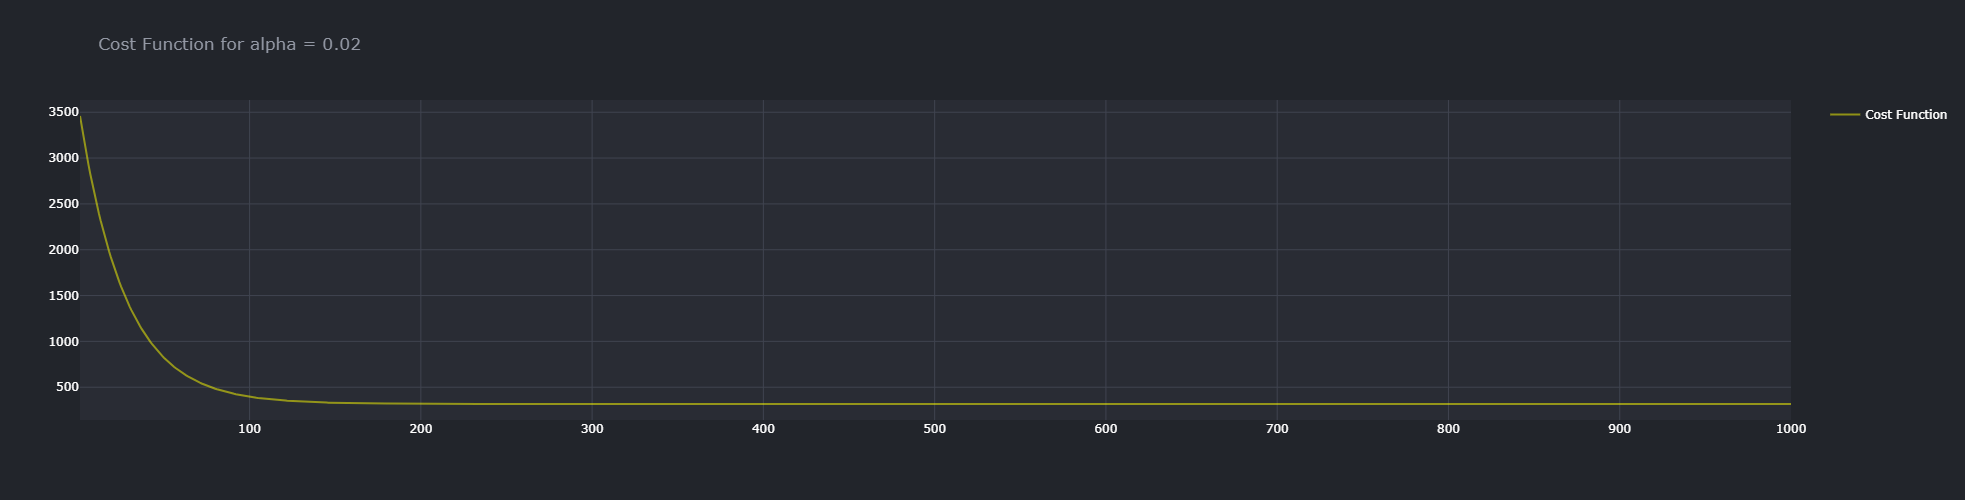

In [175]:
# set the parameter size
m = len(X)

# set the learning rate
alpha = 0.02

# set max iterations
iterations = 1000

# create the initial theta values
thetas = np.ones(2)

# add a column of 1's to a new X matrix
X = np.ones((m, 2))
X[:,1] = x[:,0]

cost_function(thetas, X, y, m)

thetas_new, j_history = gradient_descent(thetas, X, y, m, alpha, iters=iterations)

x_axis = np.linspace(1, iterations, iterations)
render(
    go.Figure(
        data = [ scatter(x_axis, j_history, 'Cost Function')]
    ),
    title='Cost Function for alpha = {}'.format(alpha)
)
